In [79]:
import pandas as pd
import numpy as np

In [80]:
import graphviz
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy import misc
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [81]:
df = pd.read_csv("C:\\Users\\Fan_2019\\Downloads\\Data Mining\\Project\\Chicago_Crimes_2012_to_2017.csv")

In [82]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [83]:
#Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.
df['Block'].unique()

array(['013XX S SAWYER AVE', '061XX S DREXEL AVE', '053XX W CHICAGO AVE',
       ..., '041XX N Troy St', '016XX W Superior St', '000XX W 79TH ST'],
      dtype=object)

In [84]:
#Primary Type - The primary description of the IUCR code.
df['Primary Type'].unique()

array(['BATTERY', 'PUBLIC PEACE VIOLATION', 'THEFT', 'WEAPONS VIOLATION',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'ASSAULT', 'OTHER OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'BURGLARY', 'STALKING', 'CRIM SEXUAL ASSAULT', 'NARCOTICS',
       'SEX OFFENSE', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'KIDNAPPING', 'HOMICIDE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'PROSTITUTION', 'GAMBLING', 'INTIMIDATION', 'ARSON',
       'LIQUOR LAW VIOLATION', 'NON-CRIMINAL', 'PUBLIC INDECENCY',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [85]:
# df['Primary Type'] = df['Primary Type'].replace({
#     'BATTERY':0,
#     'PUBLIC PEACE VIOLATION':1,
#     'THEFT':2,
#     'WEAPONS VIOLATION':3,
#     'ROBBERY':4, 
#     'MOTOR VEHICLE THEFT':5,
#     'ASSAULT':6,
#     'OTHER OFFENSE':7,
#     'DECEPTIVE PRACTICE':8,
#     'CRIMINAL DAMAGE':9,
#     'CRIMINAL TRESPASS':10,
#     'BURGLARY':11,
#     'STALKING':12,
#     'CRIM SEXUAL ASSAULT':13,
#     'NARCOTICS':14,
#     'SEX OFFENSE':15,
#     'OBSCENITY':16,
#     'OFFENSE INVOLVING CHILDREN':17,
#     'KIDNAPPING':18,
#     'HOMICIDE':19,
#     'INTERFERENCE WITH PUBLIC OFFICER':20,
#     'PROSTITUTION':21,
#     'GAMBLING':22,
#     'INTIMIDATION':23,
#     'ARSON':24,
#     'LIQUOR LAW VIOLATION':25,
#     'NON-CRIMINAL':26,
#     'PUBLIC INDECENCY':27,
#     'HUMAN TRAFFICKING':28,
#     'CONCEALED CARRY LICENSE VIOLATION':29,
#     'NON - CRIMINAL':30,
#     'OTHER NARCOTIC VIOLATION':31,
#     'NON-CRIMINAL (SUBJECT SPECIFIED)':32
# })


In [86]:
# df['Primary Type'] = df['Primary Type'].replace({
#     'BATTERY':0,
#     'PUBLIC PEACE VIOLATION':0,
#     'THEFT':0,
#     'WEAPONS VIOLATION':1,
#     'ROBBERY':1, 
#     'MOTOR VEHICLE THEFT':0,
#     'ASSAULT':0,
#     'OTHER OFFENSE':0,
#     'DECEPTIVE PRACTICE':0,
#     'CRIMINAL DAMAGE':0,
#     'CRIMINAL TRESPASS':0,
#     'BURGLARY':0,
#     'STALKING':0,
#     'CRIM SEXUAL ASSAULT':1,
#     'NARCOTICS':0,
#     'SEX OFFENSE':1,
#     'OBSCENITY':1,
#     'OFFENSE INVOLVING CHILDREN':1,
#     'KIDNAPPING':1,
#     'HOMICIDE':1,
#     'INTERFERENCE WITH PUBLIC OFFICER':1,
#     'PROSTITUTION':0,
#     'GAMBLING':0,
#     'INTIMIDATION':0,
#     'ARSON':1,
#     'LIQUOR LAW VIOLATION':0,
#     'NON-CRIMINAL':0,
#     'PUBLIC INDECENCY':0,
#     'HUMAN TRAFFICKING':1,
#     'CONCEALED CARRY LICENSE VIOLATION':0,
#     'NON - CRIMINAL':0,
#     'OTHER NARCOTIC VIOLATION':0,
#     'NON-CRIMINAL (SUBJECT SPECIFIED)':0
# })


In [87]:
df['Primary Type'] = df['Primary Type'].replace({    
'ROBBERY':0,
'THEFT':0,
'BURGLARY':0,
'ARSON':1,
'BATTERY':1,
'ASSAULT':1,
'KIDNAPPING':1,
'HOMICIDE':1,
'MOTOR VEHICLE THEFT':2,
'CRIMINAL DAMAGE':2,
'CRIMINAL TRESPASS':2,
'PUBLIC PEACE VIOLATION':2,
'DECEPTIVE PRACTICE':2,
'INTERFERENCE WITH PUBLIC OFFICER':2,
'INTIMIDATION':2,
'STALKING':3,
'CRIM SEXUAL ASSAULT':3,
'NARCOTICS':3,
'SEX OFFENSE':3,
'OBSCENITY':3,
'OFFENSE INVOLVING CHILDREN':3,
'PROSTITUTION':3,
'PUBLIC INDECENCY':3,
'HUMAN TRAFFICKING':3,
'WEAPONS VIOLATION':4,
'LIQUOR LAW VIOLATION':4,   
'CONCEALED CARRY LICENSE VIOLATION':4,
'GAMBLING':4,
'NARCOTICS':4,
'OTHER NARCOTIC VIOLATION':4,
'NON-CRIMINAL':5,
'OTHER OFFENSE':5,   
'NON-CRIMINAL (SUBJECT SPECIFIED)':5,
'NON - CRIMINAL':5
})

In [88]:
# #Description - The secondary description of the IUCR code, a subcategory of the primary description.
# df['Description'].unique()

In [89]:
#Location Description - Description of the location where the incident occurred.
df['Location Description'].unique()

array(['APARTMENT', 'RESIDENCE', 'STREET', 'SIDEWALK',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'RESIDENCE PORCH/HALLWAY',
       'VEHICLE NON-COMMERCIAL', 'OTHER', 'RESIDENCE-GARAGE',
       'VEHICLE-COMMERCIAL', 'PARKING LOT/GARAGE(NON.RESID.)',
       'SCHOOL, PUBLIC, GROUNDS', 'CHA PARKING LOT/GROUNDS',
       'MEDICAL/DENTAL OFFICE', 'RESTAURANT', 'SMALL RETAIL STORE',
       'CTA TRAIN', 'SCHOOL, PUBLIC, BUILDING',
       'HOSPITAL BUILDING/GROUNDS', 'DRUG STORE',
       'RESIDENTIAL YARD (FRONT/BACK)', 'GROCERY FOOD STORE', nan,
       'COLLEGE/UNIVERSITY GROUNDS', 'BANK', 'BAR OR TAVERN',
       'ATHLETIC CLUB', 'SPORTS ARENA/STADIUM', 'PARK PROPERTY',
       'NURSING HOME/RETIREMENT HOME', 'ATM (AUTOMATIC TELLER MACHINE)',
       'COMMERCIAL / BUSINESS OFFICE', 'ALLEY', 'VACANT LOT/LAND',
       'GAS STATION', 'POLICE FACILITY/VEH PARKING LOT', 'HOTEL/MOTEL',
       'LIBRARY', 'TAXICAB', 'SCHOOL, PRIVATE, GROUNDS',
       'HIGHWAY/EXPRESSWAY', 'CONVENIENCE STORE', 'TAVERN/LIQU

In [90]:
df['Location Description'] = df['Location Description'].replace({
    'APARTMENT':1,
    'RESIDENCE':1,
    'STREET':0,
    'SIDEWALK':0,
    'CHA HALLWAY/STAIRWELL/ELEVATOR':0,
    'RESIDENCE PORCH/HALLWAY':0,
    'VEHICLE NON-COMMERCIAL':1,
    'OTHER':0,
    'RESIDENCE-GARAGE':1,
    'VEHICLE-COMMERCIAL':1,
    'PARKING LOT/GARAGE(NON.RESID.)':1,
    'SCHOOL, PUBLIC, GROUNDS':0, 
    'CHA PARKING LOT/GROUNDS':0,
    'MEDICAL/DENTAL OFFICE':1, 
    'RESTAURANT':0, 
    'SMALL RETAIL STORE':1,
    'CTA TRAIN':0, 
    'SCHOOL, PUBLIC, BUILDING':0,
    'HOSPITAL BUILDING/GROUNDS':0, 
    'DRUG STORE':0,
    'RESIDENTIAL YARD (FRONT/BACK)':0, 
    'GROCERY FOOD STORE':0,
 
    'COLLEGE/UNIVERSITY GROUNDS':0, 
    'BANK':0, 
    'BAR OR TAVERN':0,
    'ATHLETIC CLUB':0, 
    'SPORTS ARENA/STADIUM':0, 
    'PARK PROPERTY':0,
    'NURSING HOME/RETIREMENT HOME':0,
    'ATM (AUTOMATIC TELLER MACHINE)':0,
    'COMMERCIAL / BUSINESS OFFICE':1, 
    'ALLEY':0, 
    'VACANT LOT/LAND':0,
    'GAS STATION':0, 
    'POLICE FACILITY/VEH PARKING LOT':0, 
    'HOTEL/MOTEL':1,
    'LIBRARY':0, 
    'TAXICAB':0, 
    'SCHOOL, PRIVATE, GROUNDS':1,
    'HIGHWAY/EXPRESSWAY':0,
    'CONVENIENCE STORE':0,
    'TAVERN/LIQUOR STORE':0,
    'ABANDONED BUILDING':0,
        'CTA BUS':0,
    'DEPARTMENT STORE':0,
    'CTA STATION':0,
    'CTA PLATFORM':0,
    'OTHER COMMERCIAL TRANSPORTATION':0,
        'CHA APARTMENT':0,
    'ANIMAL HOSPITAL':0,
    'DRIVEWAY - RESIDENTIAL':0,
    'BARBERSHOP':0,
    'CHURCH/SYNAGOGUE/PLACE OF WORSHIP':0,
    'SCHOOL, PRIVATE, BUILDING':1,
    'YARD':0,
    'GOVERNMENT BUILDING/PROPERTY':0,
    'AIRPORT/AIRCRAFT':0,
    'CTA GARAGE / OTHER PROPERTY':1,
    'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA':0,
    'CURRENCY EXCHANGE':0,
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA':1,
    'VEHICLE - OTHER RIDE SERVICE':0,
    'WAREHOUSE':1,
    'CONSTRUCTION SITE':1,
        'CTA BUS STOP':0,
    'DAY CARE CENTER':0,
    'PAWN SHOP':0,
    'MOVIE HOUSE/THEATER':1,
    'AIRPORT EXTERIOR - NON-SECURE AREA':0,
    'CAR WASH':0,
    'OTHER RAILROAD PROP / TRAIN DEPOT':0,
    'POOL ROOM':1,
    'AUTO':1,
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA':0,
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA':1,
    'BRIDGE':0,
    'APPLIANCE STORE':0,
    'CLEANING STORE':0,
    'HOUSE':1,
    'VEHICLE - DELIVERY TRUCK':1,
    'AIRPORT PARKING LOT':0,
    'FIRE STATION':0,
    'AIRPORT VENDING ESTABLISHMENT':0,
    'LAKEFRONT/WATERFRONT/RIVERBANK':0,
    'COLLEGE/UNIVERSITY RESIDENCE HALL':0,
        'CREDIT UNION':0,
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA':0,
    'FEDERAL BUILDING':0,
    'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA':1,
    'FACTORY/MANUFACTURING BUILDING':0,
    'PORCH':1,
    'AIRPORT EXTERIOR - SECURE AREA':1,
    'SAVINGS AND LOAN':0,
    'JAIL / LOCK-UP FACILITY':0,
    'PARKING LOT':0, 
    'AIRCRAFT':0,
    'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA':0,
    'BOAT/WATERCRAFT':0,
    'BARBER SHOP/BEAUTY SALON':0,
    'COIN OPERATED MACHINE':0,
    'AIRPORT TRANSPORTATION SYSTEM (ATS)':0,
    'CEMETARY':0,
    'FOREST PRESERVE':0,
    'BOWLING ALLEY':0,
    'CTA TRACKS - RIGHT OF WAY':0,
    'NEWSSTAND':0,
    'DELIVERY TRUCK':0,
    'GARAGE':1,
    'HOSPITAL':0,
    'ELEVATOR':0,
    'RAILROAD PROPERTY':0,
    'HALLWAY':0,
    'RETAIL STORE':0,
    'CLEANERS/LAUNDROMAT':0,
    'VACANT LOT':0,
    'EXPRESSWAY EMBANKMENT':0,
    'GAS STATION DRIVE/PROP.':0,
    'PUBLIC HIGH SCHOOL':0,
    'TAXI CAB':0,
    'GANGWAY':0,
    'LIQUOR STORE':0,
    'CHA PARKING LOT':0,
    'BASEMENT':1, 
    'HOTEL':1,
    'VESTIBULE':0,
    'SCHOOL YARD':0,
    'CHURCH PROPERTY':0,
    'GARAGE/AUTO REPAIR':1,
    'CTA "L" PLATFORM':0,
    'CLUB':1,
    'MOTEL':1,
    'TAVERN':0,
    'STAIRWELL':1,
    'NURSING HOME':0,
    'DRIVEWAY':0,
    'GOVERNMENT BUILDING':0,
    'OFFICE':1,
    'TRUCK':1,
    'POOLROOM':0,
    'CTA "L" TRAIN':0,
    'LAUNDRY ROOM':1, 
    'LAGOON':1
    })

In [91]:
#Arrest - Indicates whether an arrest was made.
df['Arrest'].unique()

array([ True, False])

In [92]:
#Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
df['Domestic'].unique()

array([ True, False])

In [93]:
#Beat - Indicates the beat where the incident occurred.
#A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
#Three to five beats make up a police sector, and three sectors make up a police district. 
#The Chicago Police Department has 22 police districts. 
df['Beat'].unique()

array([1022,  313, 1524, 1532, 1523,  631,  133,  215, 2432,  735,  334,
       1834, 1232, 1434,  831, 1424,  225, 2232,  222,  235, 1932, 1611,
       1831, 2223,  915,  821,  613,  122, 1513, 2534, 1923, 2433,  511,
        925, 1733,  331,  725,  533,  824,  811, 2213, 1732,  112,  424,
       2511,  914,  324, 1832,  723, 1812,  912,  622, 2531, 1422, 1432,
        922, 1122,  123,  111,  121,  512,  411, 1032, 1623,  611,  634,
        624, 1023, 2032,  712, 2535, 1634, 2412,  333, 2012, 1824,  822,
        214, 1121, 2212, 1112,  321,  412,  833,  825, 1633, 1933,  633,
        931, 1712, 2533, 1833, 1024, 1235, 1924,  623, 1934,  332,  131,
        223, 1724, 1814,  132, 1411, 1214, 1222, 1631,  232, 1632, 1231,
        715,  832, 1225,  312,  823,  422,  614, 1124, 1421, 1915,  413,
        935,  523,  722, 1423,  513,  835, 1533,  934, 1134,  421,  724,
       1213,  234, 2013, 2422, 2411, 2512, 2532, 1132,  323, 1021, 1034,
        211,  531, 1131, 1531, 1133,  726, 1613,  6

In [94]:
#District - Indicates the police district where the incident occurred. 
df['District'].unique()

array([10.,  3., 15.,  6.,  1.,  2., 24.,  7., 18., 12., 14.,  8., 22.,
       19., 16.,  9., 25.,  5., 17.,  4., 11., 20., 13., 31., nan])

In [95]:
#Ward - The ward (City Council district) where the incident occurred.
df['Ward'].unique()

array([24., 20., 37., 28.,  8.,  3., 40., 17.,  7., 42.,  2.,  4.,  1.,
       18., 34.,  5., 32., 41., 21., 11., 14., 29., 44., 48.,  9., 33.,
       16., 23., 30., 43., 26., 27., 12., 45.,  6., 25., 47., 38., 50.,
       22., 19., 13., 36., 35., 15., 46., 10., 49., 39., 31., nan])

In [96]:
# #Community Area - Indicates the community area where the incident occurred.
# df['Community Area'].unique()

In [97]:
# #FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS).
# df['FBI Code'].unique()

In [98]:
df.drop(['Unnamed: 0', 'ID', 'Case Number', 'Block', 'IUCR', 'Description', 'Domestic', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], 
         inplace=True, axis=1)

In [99]:
df = df.dropna(axis = 0, how ='any') 

In [100]:
# convert dates to pandas datetime format
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [101]:
# add a new column called Hours and time_of_day in dataframe.
df.insert(6,"Hours",df.Date.dt.hour)
df.insert(7,"time_of_day",df.Date.dt.hour/8)

In [102]:
df.head(5)

,Date,Primary Type,Location Description,Arrest,Beat,District,Hours,time_of_day
0,2016-05-03 23:40:00,1,1.0,True,1022,10.0,23,2.875
1,2016-05-03 21:40:00,1,1.0,False,313,3.0,21,2.625
2,2016-05-03 23:31:00,2,0.0,False,1524,15.0,23,2.875
3,2016-05-03 22:10:00,1,0.0,False,1532,15.0,22,2.750
4,2016-05-03 22:00:00,0,1.0,False,1523,15.0,22,2.750


In [103]:
def replace_time(val):
    if 3>=val>2:
        return 3
    elif 2>=val>1:
        return 2
    else:
        return 1

df["time_of_day"] = df["time_of_day"].apply(replace_time, 1)

In [104]:
df.head(10)

,Date,Primary Type,Location Description,Arrest,Beat,District,Hours,time_of_day
0,2016-05-03 23:40:00,1,1.0,True,1022,10.0,23,3
1,2016-05-03 21:40:00,1,1.0,False,313,3.0,21,3
2,2016-05-03 23:31:00,2,0.0,False,1524,15.0,23,3
3,2016-05-03 22:10:00,1,0.0,False,1532,15.0,22,3
4,2016-05-03 22:00:00,0,1.0,False,1523,15.0,22,3
5,2016-05-03 22:35:00,1,0.0,False,631,6.0,22,3
6,2016-05-03 22:30:00,1,0.0,False,133,1.0,22,3
7,2016-05-03 21:30:00,1,0.0,False,215,2.0,21,3
8,2016-05-03 16:00:00,1,0.0,False,2432,24.0,16,2
9,2016-05-03 22:30:00,1,0.0,False,735,7.0,22,3


In [105]:
train, test = train_test_split(df, test_size = 0.30)
print("Training samples: {}; Test samples: {}".format(len(train), len(test)))

Training samples: 1018538; Test samples: 436517


In [106]:
features = ["Primary Type", "Location Description", "Beat", "District", "time_of_day"]
target = ["Arrest"]

X_train = train[features]
y_train = train["Arrest"]

X_test = test[features]
y_test = test["Arrest"]


In [107]:
X_train.head()

,Primary Type,Location Description,Beat,District,time_of_day
1225319,0,1.0,2012,20.0,3
917039,1,0.0,212,2.0,2
975675,2,1.0,531,5.0,2
946459,2,1.0,1933,19.0,3
784604,1,0.0,1822,18.0,1


In [108]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

#Predict Output
predicted = model.predict(X_test) 
print ("Predicted Value:", predicted)

# https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

Predicted Value: [False False False ... False  True False]


In [116]:
print("Accuracy:",accuracy_score(y_test.values, predicted))

Accuracy: 0.7987042887218596


In [140]:
def specificity_loss_func(y_test, predicted):
    print (predicted)
    tp, tn, fn, fp = 0.0,0.0,0.0,0.0
    for l,m in enumerate(y_test):        
        if m==predicted[l] and m==1:
            tp+=1
        if m==predicted[l] and m==0:
            tn+=1
        if m!=predicted[l] and m==1:
            fn+=1
        if m!=predicted[l] and m==0:
            fp+=1
            
    return  tp, tn, fn, fp
# True Positive(tp)
# True Negative(tn)
# False Positive(fp)
# False Negative(fn)
# https://stackoverflow.com/questions/33275461/specificity-in-scikit-learn

In [118]:
tp, tn, fn, fp = specificity_loss_func(y_test, predicted)

[False False False ... False  True False]


In [142]:
precision = tp/(tp+fp)
sensitivity = tp/(tp+fn)
recall = sensitivity
specificity = tn/(tn+tp)

print("\n precision=", precision, "\n recall=", recall, "\n sensitivity=", sensitivity, "\n specificity=", specificity)

# https://en.wikipedia.org/wiki/Sensitivity_and_specificity


 precision= 0.6788440796201095 
 recall= 0.42733942365348665 
 sensitivity= 0.42733942365348665 
 specificity= 0.8610002065120121


In [139]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted, pos_label=2)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?fbclid=IwAR3DFY_wqQjnINHX0EBpNpjJ5cCKeJqcqkbBnaTZuKVJyJ9U4T3PL4A2Nk4

C:\Users\Fan_2019\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [136]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predicted)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

Average precision-recall score: 0.44


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.44')

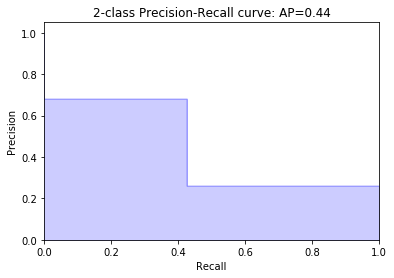

In [137]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, predicted)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html